In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import sqlite3 as sqlite
import geopandas 
from descartes import PolygonPatch
import seaborn as sns
import plotly.express as px
import datetime
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go



In [2]:
# Establishing connection with SQL database
db_connection = sqlite.connect('database.sqlite')
tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type = 'table';""", db_connection)


In [3]:
# All data sets from SQL database
countries = pd.read_sql("""SELECT * FROM Country;""", db_connection)
leagues = pd.read_sql("""SELECT * FROM League JOIN Country C on League.country_id = C.id;""", db_connection)
matches = pd.read_sql("""SELECT * FROM Match;""", db_connection)
player = pd.read_sql("""SELECT * FROM Player;""", db_connection)
player_attributes = pd.read_sql("""SELECT * FROM Player_Attributes;""", db_connection)
team = pd.read_sql("""SELECT * FROM Team;""", db_connection)
team_attributes = pd.read_sql("""SELECT * FROM Team_Attributes;""", db_connection)
top_leagues = pd.read_sql("""SELECT * FROM Match JOIN League L on Match.league_id = L.id ;""", db_connection)



In [6]:
## Premier League home and away goals
pl_home_goals = pd.read_sql("""SELECT home_team_goal FROM Match WHERE league_id = 1729;""", db_connection)
pl_away_goals = pd.read_sql("""SELECT away_team_goal FROM Match WHERE league_id = 1729;""", db_connection)

# total goals
pl_total_goals = pl_home_goals['home_team_goal'] + pl_away_goals['away_team_goal']


## La Liga home and away goals
ll_home_goals = pd.read_sql("""SELECT home_team_goal FROM Match WHERE league_id = 21518;""", db_connection)
ll_away_goals = pd.read_sql("""SELECT away_team_goal FROM Match WHERE league_id = 21518;""", db_connection)

# total goals
ll_total_goals = ll_home_goals['home_team_goal'] + ll_away_goals['away_team_goal']


## Serie A home and away goals
sa_home_goals = pd.read_sql("""SELECT home_team_goal FROM Match WHERE league_id = 10257;""", db_connection)
sa_away_goals = pd.read_sql("""SELECT away_team_goal FROM Match WHERE league_id = 10257;""", db_connection)

# total goals
sa_total_goals = sa_home_goals['home_team_goal'] + sa_away_goals['away_team_goal']


## Ligue 1 League home and away goals
l1_home_goals = pd.read_sql("""SELECT home_team_goal FROM Match WHERE league_id = 4769;""", db_connection)
l1_away_goals = pd.read_sql("""SELECT away_team_goal FROM Match WHERE league_id = 4769;""", db_connection)

# total goals
l1_total_goals = l1_home_goals['home_team_goal'] + l1_away_goals['away_team_goal']


## Bundesliga home and away goals
bl_home_goals = pd.read_sql("""SELECT home_team_goal FROM Match WHERE league_id = 7809;""", db_connection)
bl_away_goals = pd.read_sql("""SELECT away_team_goal FROM Match WHERE league_id = 7809;""", db_connection)

# total goals
bl_total_goals = bl_home_goals['home_team_goal'] + bl_away_goals['away_team_goal']


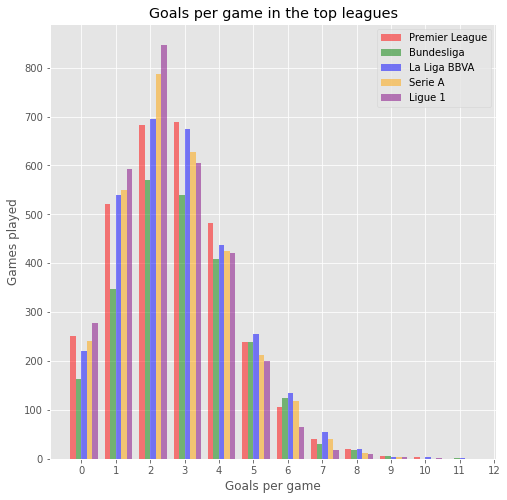

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=[8,8])
plt.hist([pl_total_goals-0.42, bl_total_goals-0.42, ll_total_goals-0.42, sa_total_goals-0.42, l1_total_goals-0.42], alpha = 0.5, label=['Premier League', 'Bundesliga', 'La Liga BBVA', 'Serie A', 'Ligue 1'], bins = 12, color=['red', 'green', 'blue', 'orange', 'purple'])
plt.title('Goals per game in the top leagues')
plt.legend(loc = 'upper right')
plt.xlabel('Goals per game')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.ylabel('Games played')
plt.show()



No handles with labels found to put in legend.


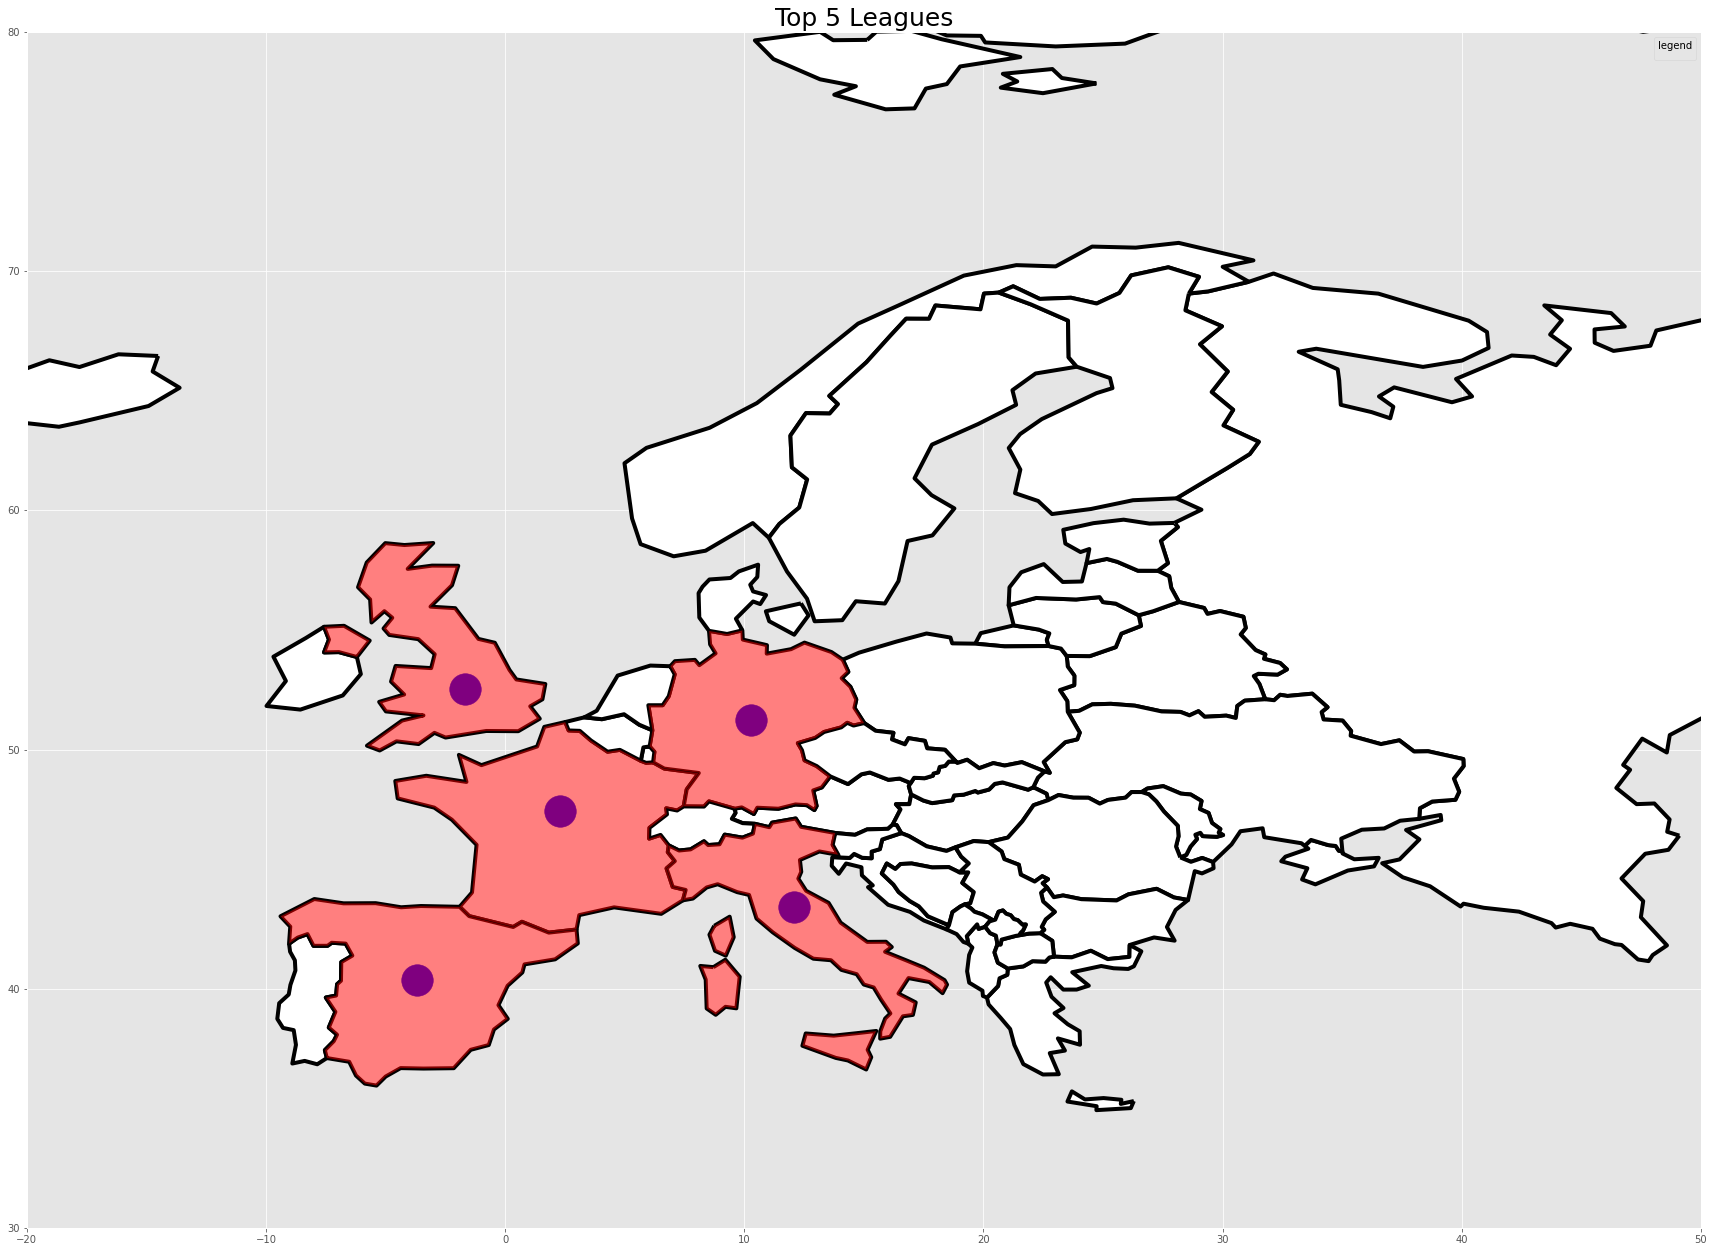

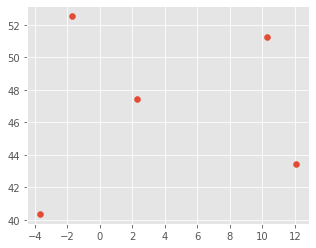

In [8]:

df = pd.DataFrame({
     'Country': ['England', 'Germany', 'France', 'Spain', 'Italy'],
     'Latitude': [52.53, 51.23, 47.43, 40.36, 43.41],
     'Longitude': [-1.69, 10.29, 2.31, -3.7, 12.1]})

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

"""Function which highlights specific countires"""
def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], 
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.5, zorder=2 ))


# We restrict to Europe.
ax = world[world.continent == 'Europe'].plot(color='white', edgecolor='black', figsize=(30,30), 
                                            linewidth=4)
ax.legend(title="legend")
ax.set_title("Top 5 Leagues", fontsize=25)

# Setting the bounds of the map
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(-20, 50)
ax.set_ylim(30, 80)


plotCountryPatch(ax, 'Germany','red')
plotCountryPatch(ax, 'Italy', 'red')
plotCountryPatch(ax, 'Spain', 'red')
plotCountryPatch(ax, 'France', 'red')
plotCountryPatch(ax, 'United Kingdom', 'red')

# Plotting map
gdf.plot(ax=ax, color='blue',  markersize=1000, alpha=1)
gdf.plot()
plt.show()




In [68]:
pl_home_win_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 1729 AND home_team_goal > away_team_goal;""", db_connection)
pl_home_draw_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 1729 AND home_team_goal = away_team_goal;""", db_connection)
pl_home_loss_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 1729 AND home_team_goal < away_team_goal;""", db_connection)
pl_all_games = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 1729;""", db_connection)

ll_home_win_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 21518 AND home_team_goal > away_team_goal;""", db_connection)
ll_home_draw_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 21518 AND home_team_goal = away_team_goal;""", db_connection)
ll_home_loss_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 21518 AND home_team_goal < away_team_goal;""", db_connection)
ll_all_games = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 21518;""", db_connection)

sa_home_win_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 10257 AND home_team_goal > away_team_goal;""", db_connection)
sa_home_draw_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 10257 AND home_team_goal = away_team_goal;""", db_connection)
sa_home_loss_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 10257 AND home_team_goal < away_team_goal;""", db_connection)
sa_all_games = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 10257;""", db_connection)

bl_home_win_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 7809 AND home_team_goal > away_team_goal;""", db_connection)
bl_home_draw_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 7809 AND home_team_goal = away_team_goal;""", db_connection)
bl_home_loss_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 7809 AND home_team_goal < away_team_goal;""", db_connection)
bl_all_games = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 7809;""", db_connection)

l1_home_win_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 4769 AND home_team_goal > away_team_goal;""", db_connection)
l1_home_draw_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 4769 AND home_team_goal = away_team_goal;""", db_connection)
l1_home_loss_rate = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 4769 AND home_team_goal < away_team_goal;""", db_connection)
l1_all_games = pd.read_sql("""SELECT home_team_goal, away_team_goal FROM Match WHERE league_id = 4769;""", db_connection)

pl_win = pl_home_win_rate.count()
pl_draw = pl_home_draw_rate.count()
pl_loss = pl_home_loss_rate.count()
pl_total = pl_all_games.count()

ll_win = ll_home_win_rate.count()  
ll_draw = ll_home_draw_rate.count()
ll_loss = ll_home_loss_rate.count()
ll_total = ll_all_games.count()    

bl_win = bl_home_win_rate.count()  
bl_draw = bl_home_draw_rate.count()
bl_loss = bl_home_loss_rate.count()
bl_total = bl_all_games.count()

l1_win = pl_home_win_rate.count()  
l1_draw = pl_home_draw_rate.count()
l1_loss = pl_home_loss_rate.count()
l1_total = pl_all_games.count()    

sa_win = sa_home_win_rate.count()  
sa_draw = sa_home_draw_rate.count()
sa_loss = sa_home_loss_rate.count()
sa_total = sa_all_games.count()


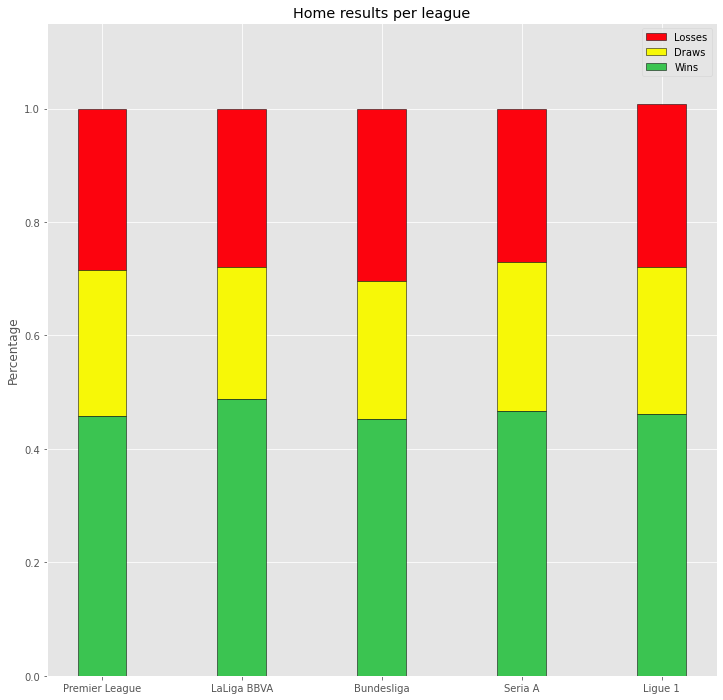

In [71]:
league_names = ['Premier League', 'LaLiga BBVA', 'Bundesliga', 'Seria A', 'Ligue 1']
win_percentages = np.array([pl_win[0]/pl_total[0], ll_win[0]/ll_total[0], bl_win[0]/bl_total[0], sa_win[0]/sa_total[0], l1_win[0]/sa_total[0]])
draw_percentages = np.array([pl_draw[0]/pl_total[0], ll_draw[0]/ll_total[0], bl_draw[0]/bl_total[0], sa_draw[0]/sa_total[0], l1_draw[0]/sa_total[0]])
loss_percentages = np.array([pl_loss[0]/pl_total[0], ll_loss[0]/ll_total[0], bl_loss[0]/bl_total[0], sa_loss[0]/sa_total[0], l1_loss[0]/sa_total[0]])
N = len(league_names)
ind = np.arange(N) # X locations for groups
width = 0.35

plt.figure(figsize=[12,12])
p1 = plt.bar(ind, loss_percentages , width, bottom=win_percentages+draw_percentages, color='#fc030e', edgecolor='black', label='Losses')
p2 = plt.bar(ind, draw_percentages, width, bottom=win_percentages, color='#f7f807', edgecolor='black', label='Draws')
p3 = plt.bar(ind, win_percentages, width, color='#3bc451', edgecolor='black', label = 'Wins')

plt.style.use('ggplot')
plt.xticks(ind,('Premier League', 'LaLiga BBVA', 'Bundesliga', 'Seria A', 'Ligue 1'))
plt.ylabel('Percentage')
plt.ylim(0,1.15)
plt.title('Home results per league')
plt.legend(loc='upper right')
plt.show()



No handles with labels found to put in legend.


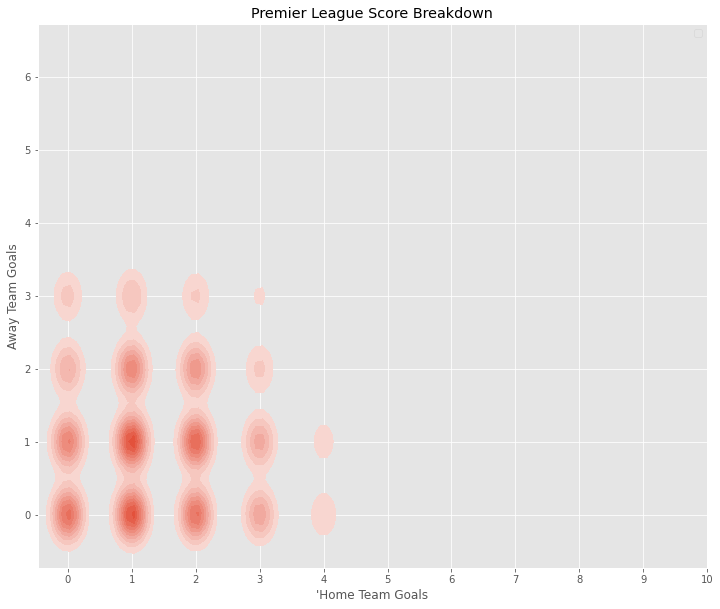

In [23]:
englishteamscores = pd.read_sql("""SELECT * FROM PremierLeagueTotalScore;""", db_connection)                                                                                    
fig = plt.figure(figsize=[12,10])

X = englishteamscores['home_team_goal']
Y = englishteamscores['away_team_goal']
sns.kdeplot(X, Y, cmap="Reds", shade=True, shade_lowest=False, cbar=True, label='Total Goals = 8240')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel("'Home Team Goals")
plt.ylabel('Away Team Goals')
plt.title('Premier League Score Breakdown')
plt.legend()
plt.show()


In [ ]:
plt.style.use('ggplot')
germanteamscores = pd.read_sql("""SELECT * FROM BundesligaTotalScore;""", db_connection)                                                                                    
plt.figure(figsize=[10,10])

X = germanteamscores['home_team_goal']
Y = germanteamscores['away_team_goal']

pal = sns.dark_palette("palegreen", as_cmap=True, reverse=True)
sns.kdeplot(X, Y, cmap=pal, shade=True, shade_lowest=False, cbar=True, label='Total Goals = 7103', gridsize=400)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel("Home Team Goals")
plt.ylabel('Away Team Goals')
plt.title('Bundesliga Score Breakdown')
plt.legend()
plt.show()


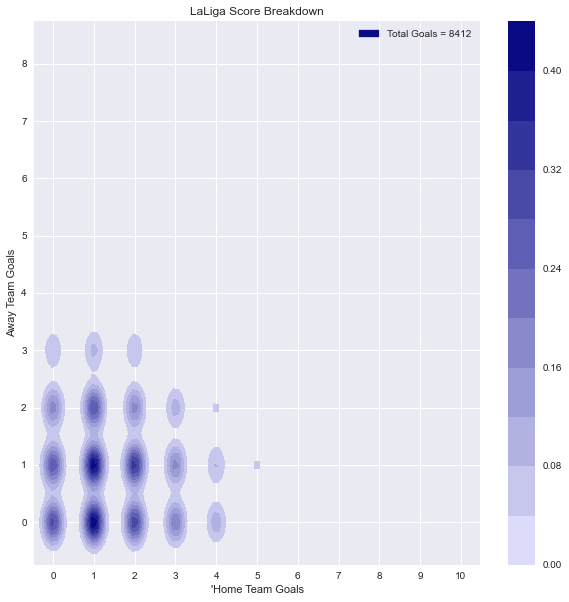

In [14]:
plt.style.use('seaborn')
spanishteamscore = pd.read_sql("""SELECT * FROM LaLigaTotalScore;""", db_connection)                                                                                    
plt.figure(figsize=[10,10])

X = spanishteamscore['home_team_goal']
Y = spanishteamscore['away_team_goal']

pal = sns.light_palette("navy", as_cmap=True)
sns.kdeplot(X, Y, cmap=pal, shade=True, shade_lowest=False, cbar=True, label='Total Goals = 8412')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel("'Home Team Goals")
plt.ylabel('Away Team Goals')
plt.title('LaLiga Score Breakdown')
plt.legend()
plt.show()


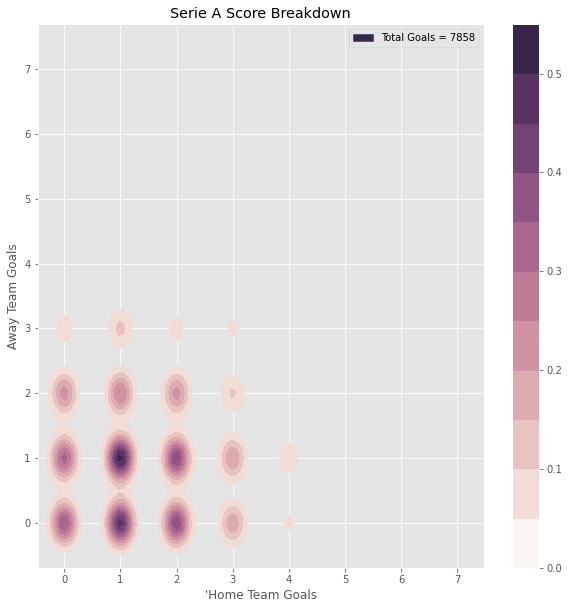

In [3]:
plt.style.use('ggplot')
italianteamscores = pd.read_sql("""SELECT * FROM SerieATotalScore;""", db_connection)                                                                                    
plt.figure(figsize=[10,10])

X = italianteamscores['home_team_goal']
Y = italianteamscores['away_team_goal']

pal = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(X, Y, cmap=pal, shade=True, shade_lowest=False, cbar=True, label='Total Goals = 7858')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7])
plt.xlabel("'Home Team Goals")
plt.ylabel('Away Team Goals')
plt.title('Serie A Score Breakdown')
plt.legend()
plt.show()


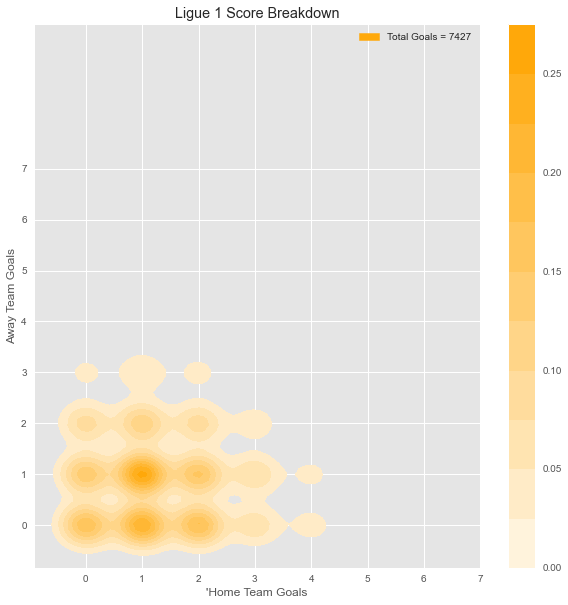

In [32]:
plt.style.use('ggplot')
frenchteamscores = pd.read_sql("""SELECT * FROM Ligue1TotalScore;""", db_connection)                                                                                    
plt.figure(figsize=[12,10])

X = frenchteamscores['home_team_goal']
Y = frenchteamscores['away_team_goal']

pal = sns.light_palette("orange", as_cmap=True)
sns.kdeplot(X, Y, cmap=pal, shade=True, shade_lowest=False, cbar=True, label='Total Goals = 7427')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7])
plt.xlabel("'Home Team Goals")
plt.ylabel('Away Team Goals')
plt.title('Ligue 1 Score Breakdown')
plt.legend()
plt.show()
    

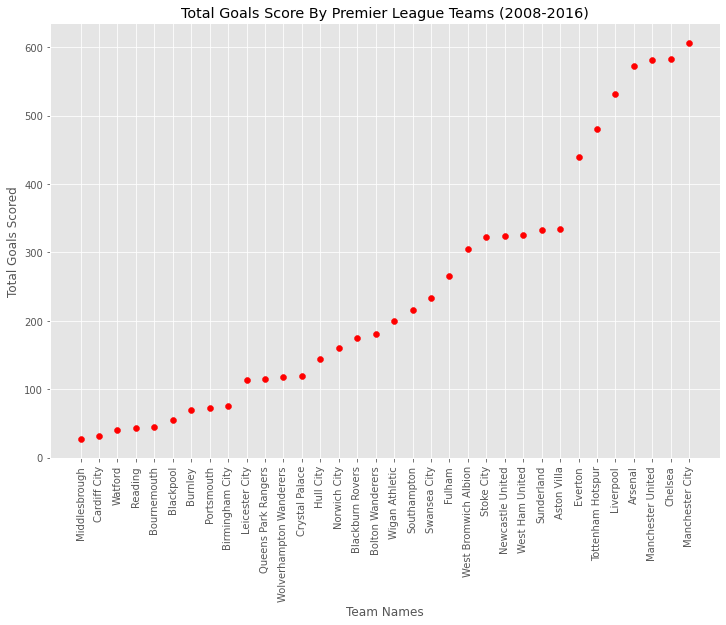

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=[12,8])
premierleagueteams = pd.read_sql("""SELECT * FROM PremierLeagueTotalGoals ORDER BY Total_Goals ASC;""", db_connection)
plteams = premierleagueteams['Team_Name']
plgoals = premierleagueteams['Total_Goals']

plt.scatter(plteams, plgoals, c='red')
plt.xticks(rotation=90)
plt.title('Total Goals Score By Premier League Teams (2008-2016)')
plt.xlabel('Team Names')
plt.ylabel('Total Goals Scored')
plt.show()


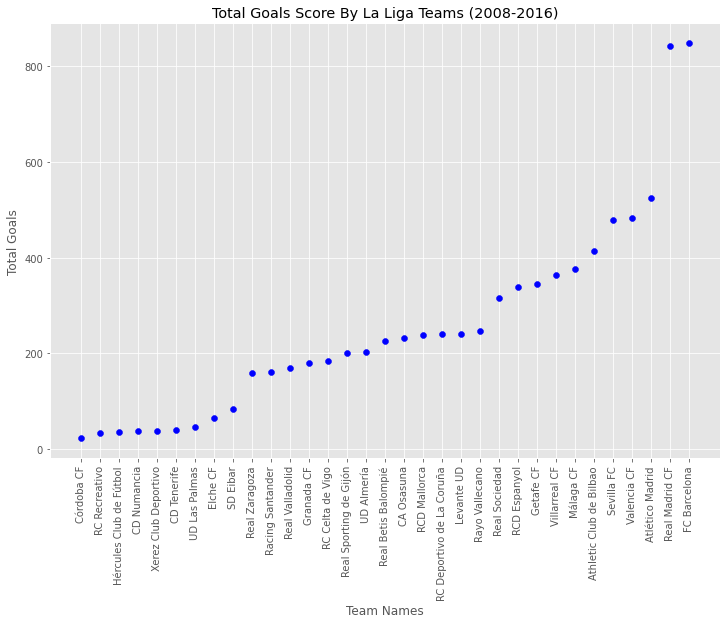

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=[12,8])
laligateams = pd.read_sql("""SELECT * FROM LaLigaTotalGoals ORDER BY Total_Goals ASC;""", db_connection)
llteams = laligateams['Team_Name']
llgoals = laligateams['Total_Goals']

plt.scatter(llteams, llgoals, c='blue')
plt.xticks(rotation=90)
plt.title('Total Goals Score By La Liga Teams (2008-2016)')
plt.xlabel('Team Names')
plt.ylabel('Total Goals Scored')
plt.show()


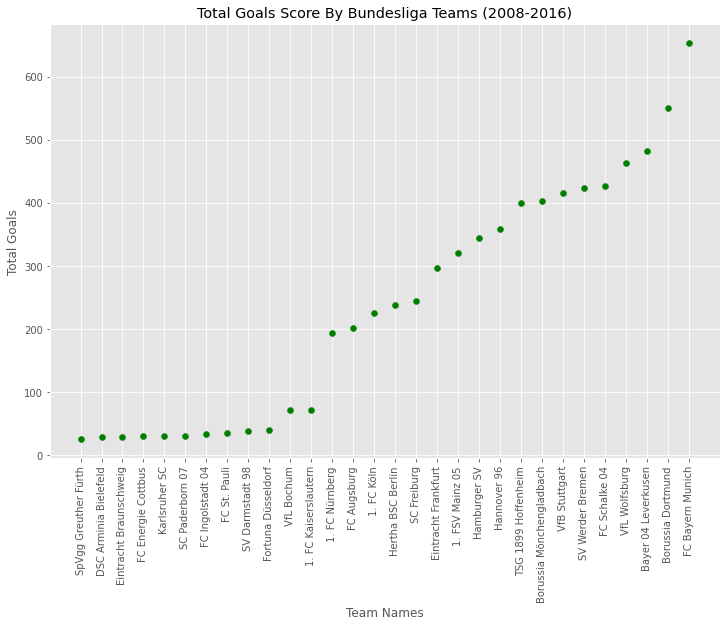

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=[12,8])
bundesligateams = pd.read_sql("""SELECT * FROM BundesligaTotalGoals ORDER BY Total_Goals ASC;""", db_connection)
blteams = bundesligateams['Team_Name']
blgoals = bundesligateams['Total_Goals']

plt.scatter(blteams, blgoals, c='green')
plt.xticks(rotation=90)
plt.title('Total Goals Score By Bundesliga Teams (2008-2016)')
plt.xlabel('Team Names')
plt.ylabel('Total Goals Score')
plt.show()


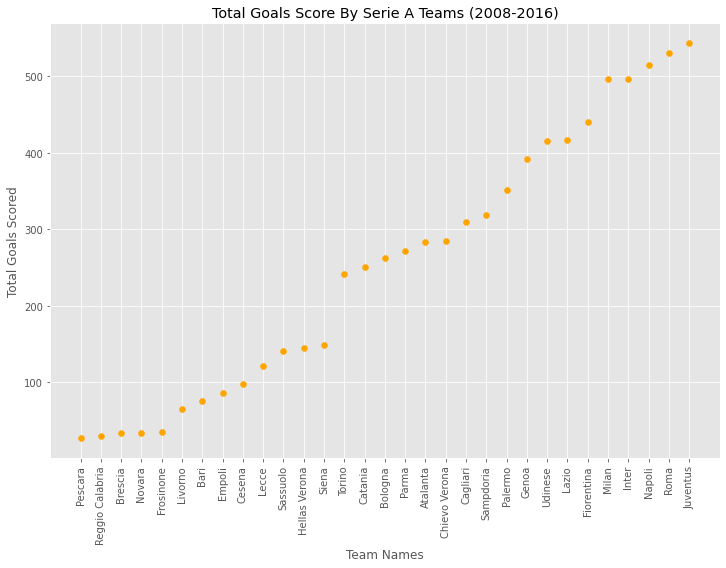

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=[12,8])
serieateams = pd.read_sql("""SELECT * FROM SerieATotalGoals ORDER BY Total_Goals ASC;""", db_connection)
sateams = serieateams['Team_Name']
sagoals = serieateams['Total_Goals']

plt.scatter(sateams, sagoals, c='orange')
plt.xticks(rotation=90)
plt.title('Total Goals Score By Serie A Teams (2008-2016)')
plt.xlabel('Team Names')
plt.ylabel('Total Goals Scored')
plt.show()


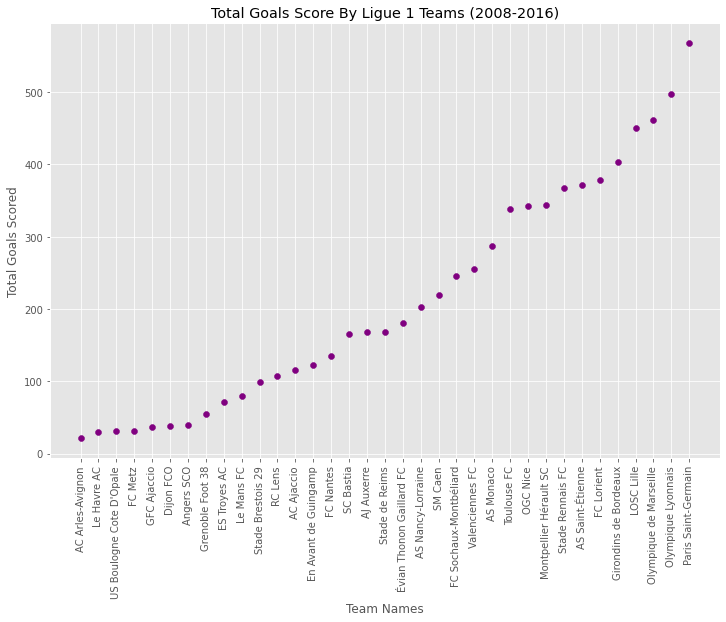

In [55]:
plt.style.use('ggplot')
plt.figure(figsize=[12,8])
league1teams = pd.read_sql("""SELECT * FROM Ligue1TotalGoals ORDER BY Total_Goals ASC;""", db_connection)
l1teams = league1teams['Team_Name']
l1goals = league1teams['Total_Goals']


plt.scatter(l1teams, l1goals, c='purple')
plt.xticks(rotation=90)
plt.title('Total Goals Score By Ligue 1 Teams (2008-2016)')
plt.xlabel('Team Names')
plt.ylabel('Total Goals Scored')
plt.show()



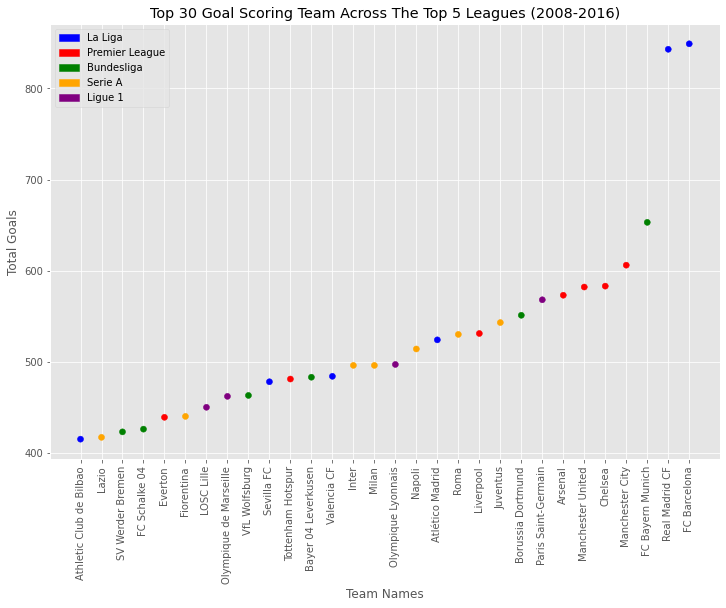

In [43]:
import matplotlib.patches as mpatches

topscoringteams = pd.read_sql("""SELECT * FROM Top30GoalScoringTeams ORDER BY Total_Goals ASC;""",db_connection)

teams = topscoringteams['Team_Name']
goals = topscoringteams['Total_Goals']

def league_colour_decider(league_list):
    cols = []
    
    for id in league_list:
        if id >= 3457 and id <= 8784:
            cols.append('red')
        elif id >= 43035 and id <= 48358:
            cols.append('blue')
        elif id >= 15617 and id <= 19917:
            cols.append('green')
        elif id >= 20513 and id <= 25791:
            cols.append('orange')
        elif id >= 9537 and id <= 14876:
            cols.append('purple')
    
    return cols

colours = league_colour_decider(topscoringteams['id'])
        
legend_dict = { 'La Liga' : 'blue', 'Premier League' : 'red', 'Bundesliga' : 'green', 'Serie A' : 'orange', 
               'Ligue 1' : 'purple'}

patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)



plt.figure(figsize=[12,8])
plt.style.use('ggplot')
plt.scatter(teams, goals, c=colours)
plt.xticks(rotation=90)
plt.title('Top 30 Goal Scoring Team Across The Top 5 Leagues (2008-2016)')
plt.xlabel('Team Names')
plt.ylabel('Total Goals')
plt.legend(handles=patchList)
plt.show()


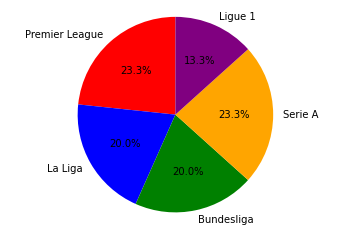

In [47]:
# Pie Chart of proportions per league in top 30

plt.style.use('ggplot')
labels = ['Premier League', 'La Liga', 'Bundesliga', 'Serie A', 'Ligue 1']
sizes = [7/30, 6/30, 6/30, 7/30, 4/30]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors = ['red', 'blue', 'green', 'orange', 'purple'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

In [32]:
prem = pd.read_sql("""SELECT * FROM PremierLeagueAvgTeamStats;""", db_connection)
laliga = pd.read_sql("""SELECT * FROM LaLigaAvgTeamStats;""", db_connection)
bund = pd.read_sql("""SELECT * FROM BundesligaAvgTeamStats;""", db_connection)
sera = pd.read_sql("""SELECT * FROM SerieAAvgTeamStats;""", db_connection)
lig1 = pd.read_sql("""SELECT * FROM Ligue1AvgTeamStats;""", db_connection)

categories = ['AvgBuildUpPlaySpeed', 'AvgBuildUpPlayDribbling', 'AvgBuildUpPlayPassing', 'AvgChanceCreationPassing',
              'AvgChanceCreationShooting','AvgDefencePressure', 'AvgDefenceAggression', 'AvgDefenceWidth']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = [prem['AvgBuildUpPlaySpeed'][0], prem['AvgBuildUpPlayDribbling'][0], prem['AvgBuildUpPlayPassing'][0], 
         prem['AvgChanceCreationPassing'][0], prem['AvgChanceCreationShooting'][0], prem['AvgDefencePressure'][0], 
         prem['AvgDefenceAggression'][0], prem['AvgDefenceWidth'][0]],
    theta = categories, 
    fill = 'toself',
    name = 'Premier League'
))

fig.add_trace(go.Scatterpolar (
    r = [laliga['AvgBuildUpPlaySpeed'][0], laliga['AvgBuildUpPlayDribbling'][0], laliga['AvgBuildUpPlayPassing'][0], 
         laliga['AvgChanceCreationPassing'][0], laliga['AvgChanceCreationShooting'][0], laliga['AvgDefencePressure'][0], 
         laliga['AvgDefenceAggression'][0], laliga['AvgDefenceWidth'][0]],
    theta = categories, 
    fill = 'toself',
    name = 'La Liga BBVA'
))

fig.add_trace(go.Scatterpolar (
    r = [bund['AvgBuildUpPlaySpeed'][0], bund['AvgBuildUpPlayDribbling'][0], bund['AvgBuildUpPlayPassing'][0], 
         bund['AvgChanceCreationPassing'][0], bund['AvgChanceCreationShooting'][0], bund['AvgDefencePressure'][0], 
         bund['AvgDefenceAggression'][0], bund['AvgDefenceWidth'][0]],
    theta = categories, 
    fill ='toself',
    name = 'Bundesliga'
))

fig.add_trace(go.Scatterpolar (
    r = [sera['AvgBuildUpPlaySpeed'][0], sera['AvgBuildUpPlayDribbling'][0], sera['AvgBuildUpPlayPassing'][0], 
         sera['AvgChanceCreationPassing'][0], sera['AvgChanceCreationShooting'][0], sera['AvgDefencePressure'][0], 
         sera['AvgDefenceAggression'][0], sera['AvgDefenceWidth'][0]],
    theta = categories, 
    fill = 'toself',
    name = 'Serie A'
))

fig.add_trace(go.Scatterpolar (
    r = [lig1['AvgBuildUpPlaySpeed'][0],lig1['AvgBuildUpPlayDribbling'][0],lig1['AvgBuildUpPlayPassing'][0], 
        lig1['AvgChanceCreationPassing'][0],lig1['AvgChanceCreationShooting'][0],lig1['AvgDefencePressure'][0], 
        lig1['AvgDefenceAggression'][0],lig1['AvgDefenceWidth'][0]],
    theta = categories, 
    fill = 'toself',
    name = 'Ligue 1'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 70],
        color='black'
    )),
  showlegend=True
)

fig.show()


